<h2>Playing with Nielsen's NIST code - SR Nov 2011</h2>
I had to modify network.py (trivial) and mnist_loader.py to work with Python3.

In [4]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [5]:
import network

In [6]:
net = network.Network([784, 30, 10])

In [5]:
net.SGD(training_data, 10, 10, 3.0, test_data=test_data)

Epoch 0: 9167 / 10000
Epoch 1: 9295 / 10000
Epoch 2: 9341 / 10000
Epoch 3: 9361 / 10000
Epoch 4: 9396 / 10000
Epoch 5: 9420 / 10000
Epoch 6: 9434 / 10000
Epoch 7: 9447 / 10000
Epoch 8: 9463 / 10000
Epoch 9: 9437 / 10000


Depending on the random initialisation, we get about 95% on the test data right. To play with this, let us extract one imange and run it through the network - almost 100% that this is a 7 - the correct result.

In [2]:
xtest,ytest=test_data[7]

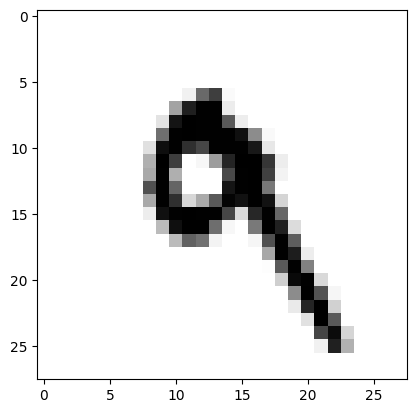

In [3]:
import matplotlib.pyplot as plt
plt.imshow(xtest.reshape(28,28),cmap='binary')
plt.show()

In [8]:
net.feedforward(xtest),ytest

(array([[8.42220351e-08],
        [4.33495792e-06],
        [1.28814951e-03],
        [3.25315548e-05],
        [9.58351829e-09],
        [6.35991980e-03],
        [5.32966506e-11],
        [9.99625722e-01],
        [4.19155783e-09],
        [1.24618664e-04]]),
 7)

Now, let us run the network on hand-drawn figures. Greyscale 28x28 images exported as raw data from GIMP can be imported as unsigned 8bit, inverted, rescaled and then reshaped to (781,1), i.e. a vector of vectors of length 1 (instead of a plain vector).

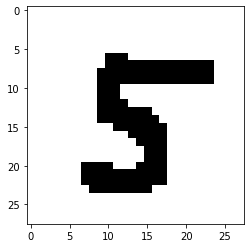

In [9]:
import numpy as np
test=1-np.fromfile('test-image2.data',dtype=np.ubyte)/255
plt.imshow(test.reshape(28,28),cmap='binary')
plt.show()

In [16]:
out = net.feedforward(np.reshape(test,(784, 1)))
out

array([[9.71896057e-05],
       [6.22108490e-07],
       [2.56472818e-06],
       [1.64169715e-03],
       [4.13088476e-05],
       [9.97932182e-01],
       [1.40247744e-09],
       [3.58218042e-07],
       [4.13523621e-03],
       [8.85903695e-04]])

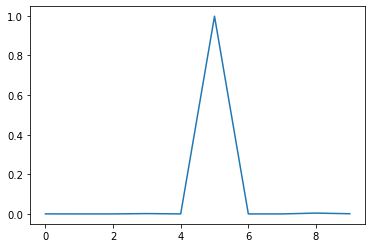

In [14]:
plt.plot(out)
plt.show()